<a href="https://colab.research.google.com/github/maxpquint/playground/blob/main/mpq_arima_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Index: 5040 entries, 0 to 5039
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  5040 non-null   object 
 1   Adjusted Price/cents  5040 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.1+ KB


ADF Statistic: -2.337679008790727
p-value: 0.1601034661650778
ADF Statistic: -36.48865405721315
p-value: 0.0
ADF Statistic: -34.49581499235612
p-value: 0.0


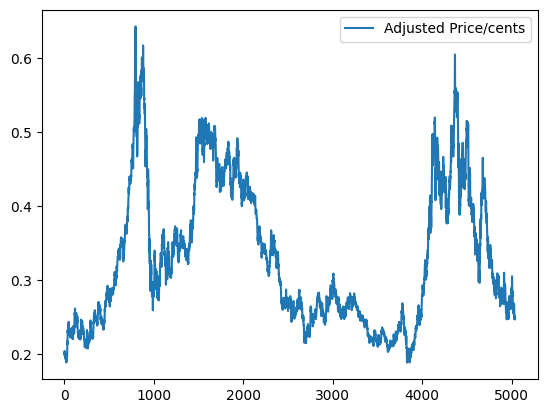

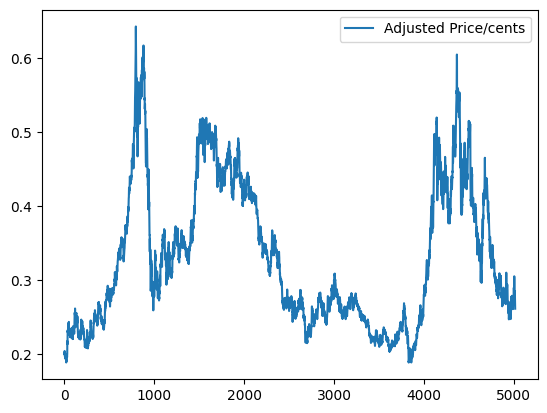

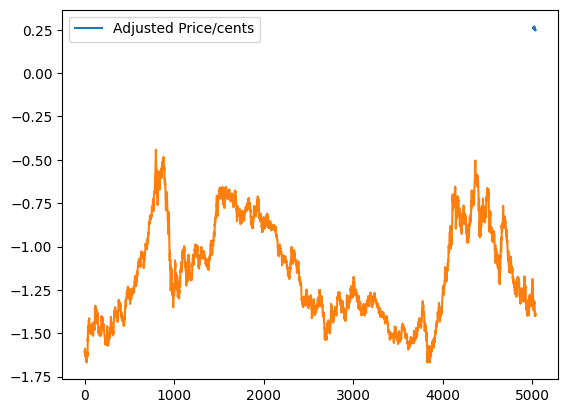

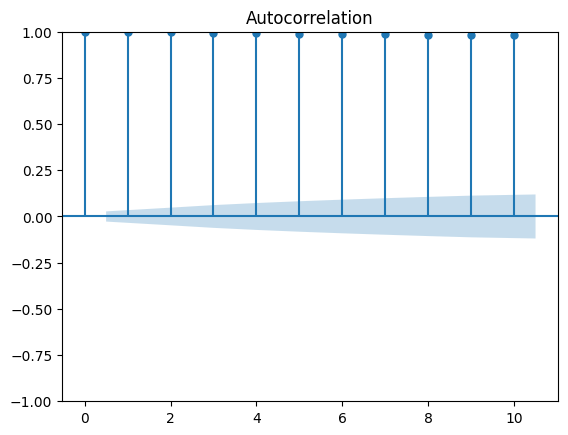

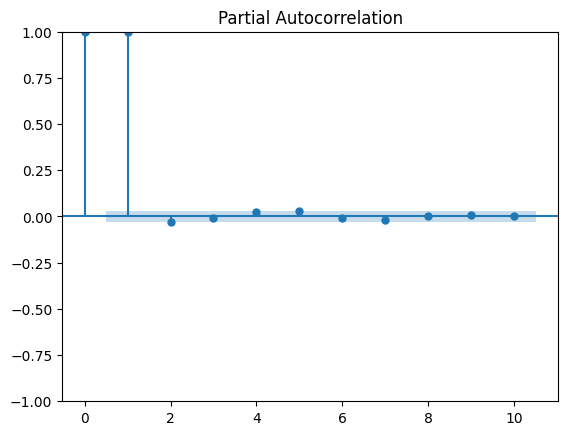

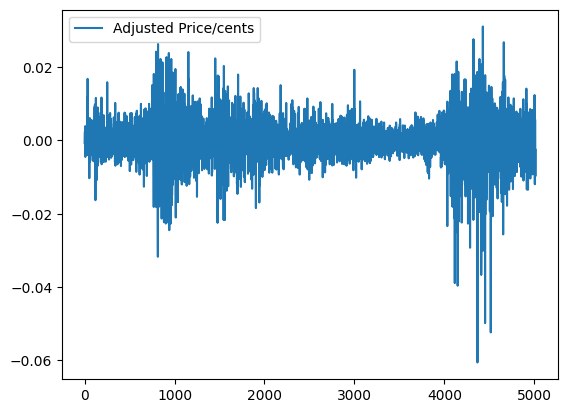

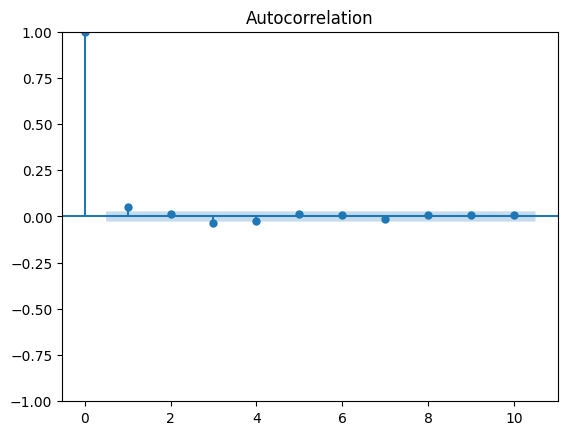

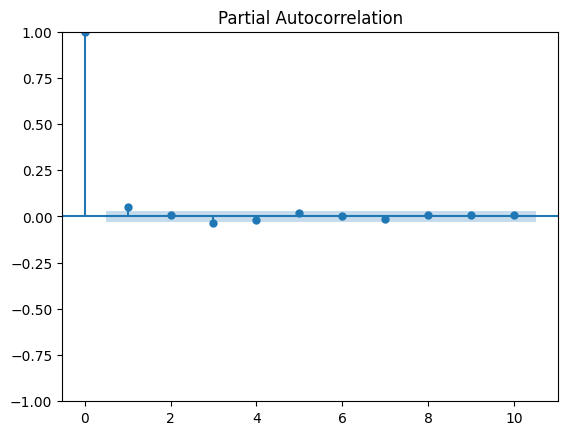

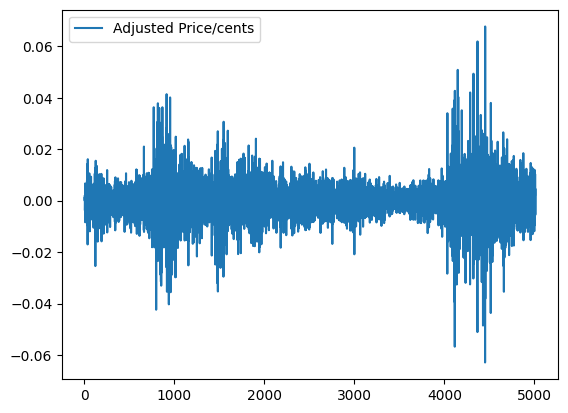

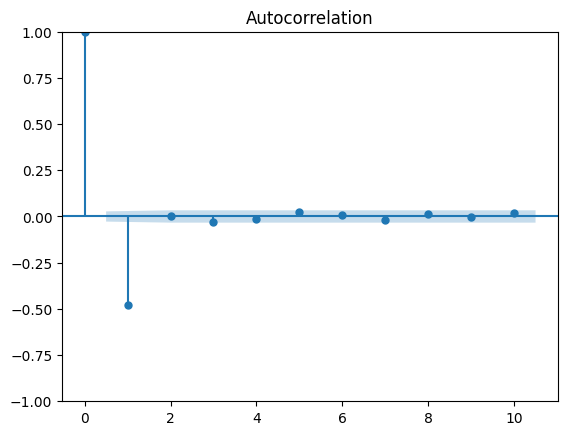

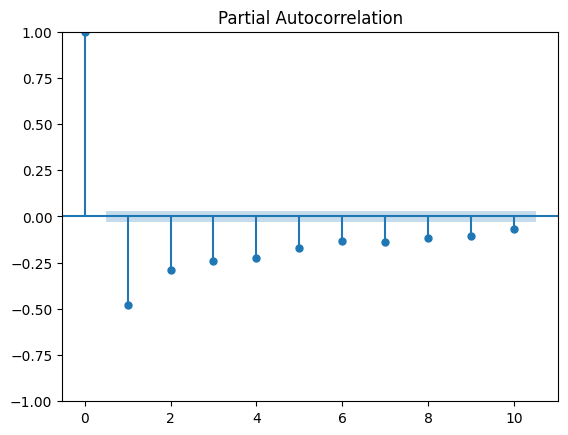

In [24]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv("https://raw.githubusercontent.com/maxpquint/playground/main/Adjusted%20sbo%202005-2025.csv").dropna()
# Ensure 'Adjusted Price/cents' is converted to numeric, handling potential errors
data['Adjusted Price/cents'] = pd.to_numeric(data['Adjusted Price/cents'], errors='coerce')
data.info()
data.plot()

msk = (data.index < len(data)-25)
# Selecting only the 'Adjusted Price/cents' column for data_train and data_test
data_train = data[['Adjusted Price/cents']][msk].copy()
data_test = data[['Adjusted Price/cents']][~msk].copy()
data_train.plot()
data_test.plot()

# Create a new variable to store the log-transformed data
log_data = np.log(data['Adjusted Price/cents'])
log_data.plot()

# Use log_data for the ACF and PACF plots
fig = plot_acf(log_data, lags=10)  # Changed data['Adjusted Price/cents'] to log_data
fig.show()

fig = plot_pacf(log_data, lags=10)  # Changed data['Adjusted Price/cents'] to log_data
fig.show()

# Use data['Adjusted Price/cents'] for the scatter plot as it needs the original values
fig = px.scatter(data["Adjusted Price/cents"], trendline='ols')
fig.show()

# Use data['Adjusted Price/cents'] for adfuller as it expects the original data
adfuller(data['Adjusted Price/cents'], maxlag=12)

adf_test = adfuller(data['Adjusted Price/cents'], maxlag=12)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

data_train_diff = data_train.diff().dropna()
data_train_diff.plot()

# Use log_data for the ACF and PACF plots
fig = plot_acf(data_train_diff, lags=10)  # Changed data['Adjusted Price/cents'] to log_data
fig.show()

fig = plot_pacf(data_train_diff, lags=10)  # Changed data['Adjusted Price/cents'] to log_data
fig.show()

adf_test_diff = adfuller(data_train_diff, maxlag=12)
print(f"ADF Statistic: {adf_test_diff[0]}")
print(f"p-value: {adf_test_diff[1]}")

data_train_diff_diff = data_train_diff.diff().dropna()
data_train_diff_diff.plot()

# Use log_data for the ACF and PACF plots
fig = plot_acf(data_train_diff_diff, lags=10)  # Changed data['Adjusted Price/cents'] to log_data
fig.show()

fig = plot_pacf(data_train_diff_diff, lags=10)  # Changed data['Adjusted Price/cents'] to log_data
fig.show()

adf_test_diff_diff = adfuller(data_train_diff_diff, maxlag=12)
print(f"ADF Statistic: {adf_test_diff_diff[0]}")
print(f"p-value: {adf_test_diff_diff[1]}")